# Lab 3 Exercise 3
## Binary Classification

We are given a dataset that consists of biological features of a person and whether or not they are a smoker.

There are *22 descriptive features* and *1 target column* in the dataset as described in the Table below. You are tasked with creating a predictive model to predict the column "SMK_stat_type_cd", which specifies smoker/non-smoker status of the person. You are expected to use classification methods that was shown in the previous exercises.



|      Column      |                                 Description                                 |
|:----------------:|:---------------------------------------------------------------------------:|
| identified_gender              | male, female                                                                |
| age              | round up to 5 years                                                         |
| height           | round up to 5 cm[cm]                                                        |
| weight           | [kg]                                                                        |
| sight_left       | eyesight(left)                                                              |
| sight_right      | eyesight(right)                                                             |
| hear_left        | hearing left, 1(normal), 2(abnormal)                                        |
| hear_right       | hearing right, 1(normal), 2(abnormal)                                       |
| SBP              | Systolic blood pressure[mmHg]                                               |
| DBP              | Diastolic blood pressure[mmHg]                                              |
| BLDS             | BLDS or FSG(fasting blood glucose)[mg/dL]                                   |
| tot_chole        | total cholesterol[mg/dL]                                                    |
| HDL_chole        | HDL cholesterol[mg/dL]                                                      |
| LDL_chole        | LDL cholesterol[mg/dL]                                                      |
| triglyceride     | triglyceride[mg/dL]                                                         |
| hemoglobin       | hemoglobin[g/dL]                                                            |
| urine_protein    | protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)                  |
| serum_creatinine | serum(blood) creatinine[mg/dL]                                              |
| SGOT_AST         | SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)[IU/L] |
| SGOT_ALT         | ALT(Alanine transaminase)[IU/L]                                             |
| gamma_GTP        | y-glutamyl transpeptidase[IU/L]                                             |
| SMK_stat_type_cd **(Target)** | Smoking state, 0(never), 1(active smoker)                      |


### The stages of this problem can be decomposed as follows:
1. Data Preparation
* Ensure data is in correct format (numerical and not string)
* Normalize the data for better convergence (optional)
* Split the data into train/test subsets

2. Model Selection
* Instanciate models and fit on training data
* Evaluate model performance on testing data
* Select model with best performance

3. Submit model
* Your model will be evaluated on data that is kept separate from training/testing data
* The predictions from your model will be uploaded to the course server where it will be evaluated

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/4c16-labs/code/lab-03/
!unzip -o data.zip
!echo 'data/*' > .gitignore

Mounted at /content/gdrive
/content/gdrive/MyDrive/4c16-labs/code/lab-03
Archive:  data.zip
   creating: data/
  inflating: data/data.csv           
  inflating: data/validation.csv     


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Data Preparation
# The data is supplied as ".csv" format
# There are 23 columns in csv file, with 22 columns being features and 1 column being the target

# The csv file can be read into as a dataframe using the pandas library
DataFrame = pd.read_csv('data/data.csv')

# Shuffle the data
DataFrame = DataFrame.sample(frac=1)

# Visualize the first 5 rows of the imported dataframe
display(DataFrame.head(6))

identified_gender  age  height  weight  waistline  sight_left  \
40897            Female   60     140      45       77.0         1.0   
9834             Female   25     170      60       76.0         0.7   
3418             Female   40     155      50       73.0         1.2   
24209            Female   20     165      50       65.0         1.0   
34312            Female   60     155      65       85.0         0.8   
37295              Male   50     165      65       77.0         1.2   

       sight_right  hear_left  hear_right    SBP  ...  HDL_chole  LDL_chole  \
40897          0.7        1.0         1.0  130.0  ...       53.0      155.0   
9834           1.0        1.0         1.0  110.0  ...       70.0      101.0   
3418           1.2        1.0         1.0  106.0  ...       94.0      112.0   
24209          0.9        1.0         1.0  104.0  ...       61.0      107.0   
34312          1.2        1.0         1.0  158.0  ...       58.0      155.0   
37295          1.0        1.0         1.0  118.0  ...       36.0      108.0   

       triglyceride  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
40897         168.0        14.1            1.0               1.0      36.0   
9834           67.0        15.0            1.0               0.9      18.0   
3418           72.0        13.6            1.0               0.7      16.0   
24209          45.0        13.6            1.0               0.8      32.0   
34312         146.0        15.1            1.0               0.7      28.0   
37295         194.0        16.2            1.0               0.9      21.0   

       SGOT_ALT  gamma_GTP  SMK_stat_type_cd  
40897      40.0       40.0               0.0  
9834       11.0       11.0               1.0  
3418        9.0        9.0               0.0  
24209      33.0       20.0               0.0  
34312      31.0       31.0               0.0  
37295      37.0       23.0               0.0  

[6 rows x 23 columns]

In [4]:
# The column "identified_gender" contains non-numeric data. This cannot be used as is and needs to be converted to numerical representations
# We can encode the identified gender to a numerical representation by letting "female" == 0, and "male" == 1.
# This can be done manually by using conditional statements on the dataframe, but luckily for us there is a simpler method
# We can use the built in LabelEncoder function of sklearn to do this

LabelEncoder = sklearn.preprocessing.LabelEncoder()
LabelEncoder.fit(DataFrame['identified_gender'])
DataFrame['identified_gender'] = LabelEncoder.transform(DataFrame['identified_gender'])

# Label encoder sorts the input column of data in alphabetical order, and then assigns a numerical value to each unique entry
# This results in 'female' being mapped to 0, 'male' being mapped to 1
display(DataFrame.head(6))

identified_gender  age  height  weight  waistline  sight_left  \
40897                  0   60     140      45       77.0         1.0   
9834                   0   25     170      60       76.0         0.7   
3418                   0   40     155      50       73.0         1.2   
24209                  0   20     165      50       65.0         1.0   
34312                  0   60     155      65       85.0         0.8   
37295                  1   50     165      65       77.0         1.2   

       sight_right  hear_left  hear_right    SBP  ...  HDL_chole  LDL_chole  \
40897          0.7        1.0         1.0  130.0  ...       53.0      155.0   
9834           1.0        1.0         1.0  110.0  ...       70.0      101.0   
3418           1.2        1.0         1.0  106.0  ...       94.0      112.0   
24209          0.9        1.0         1.0  104.0  ...       61.0      107.0   
34312          1.2        1.0         1.0  158.0  ...       58.0      155.0   
37295          1.0        1.0         1.0  118.0  ...       36.0      108.0   

       triglyceride  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
40897         168.0        14.1            1.0               1.0      36.0   
9834           67.0        15.0            1.0               0.9      18.0   
3418           72.0        13.6            1.0               0.7      16.0   
24209          45.0        13.6            1.0               0.8      32.0   
34312         146.0        15.1            1.0               0.7      28.0   
37295         194.0        16.2            1.0               0.9      21.0   

       SGOT_ALT  gamma_GTP  SMK_stat_type_cd  
40897      40.0       40.0               0.0  
9834       11.0       11.0               1.0  
3418        9.0        9.0               0.0  
24209      33.0       20.0               0.0  
34312      31.0       31.0               0.0  
37295      37.0       23.0               0.0  

[6 rows x 23 columns]

In [5]:
# We should now separate the input features from the target feature and store them as different variables
# We do this by slicing what columns of data we want from the dataframe
# Let's first see the columns available to us by printing DataFrame.columns
print(DataFrame.columns)

Index(['identified_gender', 'age', 'height', 'weight', 'waistline',
       'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP',
       'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride',
       'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST',
       'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd'],
      dtype='object')


In [6]:
# The column titled "SMK_stat_type_cd" is our target, and all remaining variables are our input features.
features_columns = DataFrame.columns[:-1]
target_column = DataFrame.columns[-1:]

DataFrame_X = DataFrame[features_columns]   # Selects only Input features
DataFrame_Y = DataFrame[target_column]      # Selects only Target variable

In [7]:
# Split Data into Train/Test split
# Change the variable "test_frac" to reflect the percentage/fraction of test data in the resulting split
test_frac = 0.15

Train_X, Test_X, Train_Y, Test_Y = train_test_split(DataFrame_X, DataFrame_Y, test_size=test_frac)
print(f"Number of rows for Training:\t{Train_X.shape[0]}\nNumber of rows for Testing:\t{Test_X.shape[0]}")

Number of rows for Training:	42500
Number of rows for Testing:	7500


Fitting models, this may take a while


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model: Logistic Regression
Train F1 Score: 0.751
Test  F1 Score: 0.749


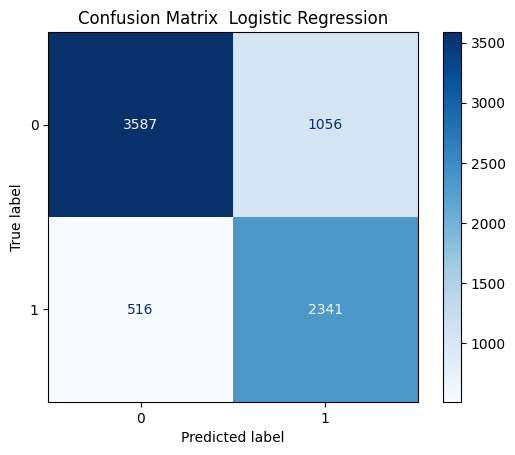


Model: K-NN Classification
Train F1 Score: 0.750
Test  F1 Score: 0.625


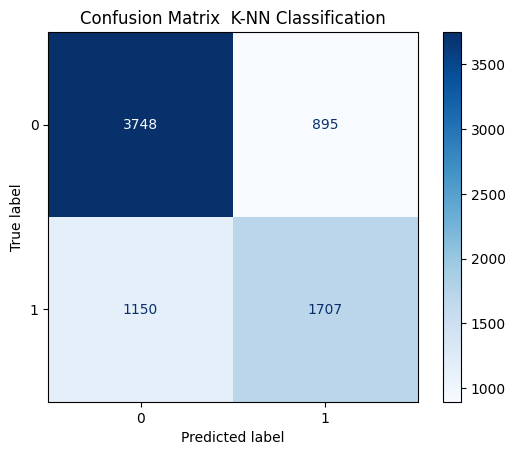


Model: SVM (RBF Kernel)
Train F1 Score: 0.705
Test  F1 Score: 0.704


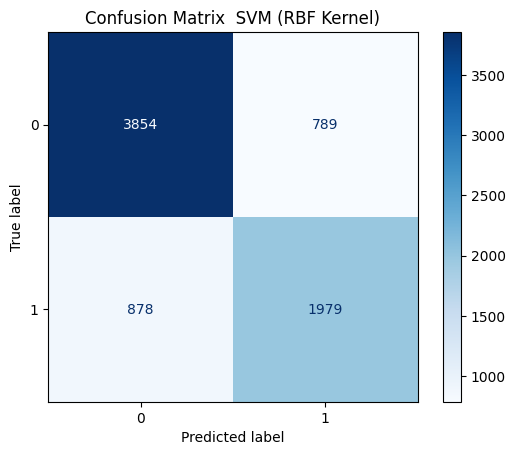


Model: Decision Tree
Train F1 Score: 0.749
Test  F1 Score: 0.741


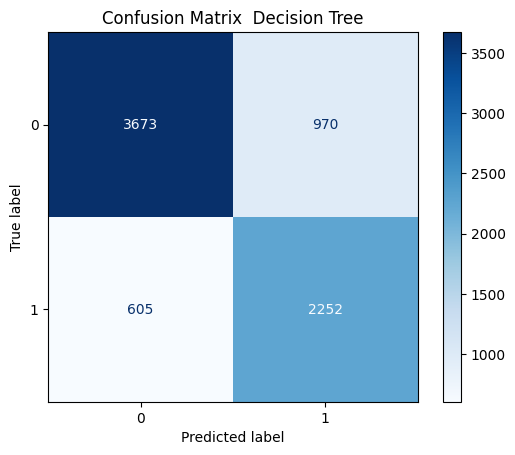


Model: Random Forest
Train F1 Score: 1.000
Test  F1 Score: 0.748


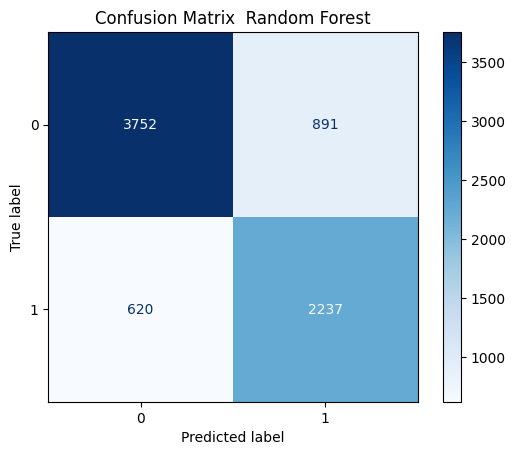


Best Model: Logistic Regression


In [9]:
# EDIT THIS CELL
# Construct a dictionary of prediction models to compare
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Uncomment the below dictionary and insert as many prediction models as you like.
# You may have used binary classification models in previous exercises
# You may also have to import these modules/libraries to be able to use them

PredictionModels = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-NN Classification': KNeighborsClassifier(n_neighbors=5),
    'SVM (RBF Kernel)': SVC(kernel='rbf', C=1, gamma='scale'),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

models = list(PredictionModels.keys())

print("Fitting models, this may take a while")
for _model in models:
    clf = PredictionModels[_model]
    clf.fit(Train_X, Train_Y.values.ravel())  # Train the model

    # Predictions on train and test data
    pred_train = clf.predict(Train_X)
    pred_test = clf.predict(Test_X)

    # Compute F1 scores (macro or binary average)
    f1_train = f1_score(Train_Y, pred_train)
    f1_test = f1_score(Test_Y, pred_test)

    print(f"\nModel: {_model}")
    print(f"Train F1 Score: {f1_train:.3f}")
    print(f"Test  F1 Score: {f1_test:.3f}")

    # Confusion matrix
    cm = confusion_matrix(Test_Y, pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix  {_model}')
    plt.show()
    # This loop goes through the models in the variable "PredictionModels"
    # Complete the below code block to fit to the model to training data "Train_X, Train_Y"
    # Peform predictions on the fitted model on the Train set and Test set
    # compute f1 score

best_model_name = max(PredictionModels.keys(), key=lambda name: f1_score(Test_Y, PredictionModels[name].predict(Test_X)))
best_model = PredictionModels[best_model_name]
print(f"\nBest Model: {best_model_name}")


In [10]:
# Select the model with best f1 score and write down the
# corresponding 'key' value from the 'PredictionModels' variable
# Eg if Logistic Regression is chosen then: chosen_model = 'Logistic Regression'
best_f1 = 0
chosen_model = ''

for _model in PredictionModels:
    clf = PredictionModels[_model]
    clf.fit(Train_X, Train_Y.values.ravel())
    pred_test = clf.predict(Test_X)
    f1 = f1_score(Test_Y, pred_test)

    if f1 > best_f1:
        best_f1 = f1
        chosen_model = _model

print(f"{chosen_model}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression


In [12]:
# DO NOT EDIT.
# Generate predictions using "chosen_model" and save to file

backend_features = pd.read_csv('data/validation.csv')
backend_features['identified_gender'] = LabelEncoder.transform(backend_features['identified_gender'])
backend_preds = PredictionModels[chosen_model].predict(backend_features)
np.savez_compressed('lab3_ex3_preds', lab3_model=backend_preds)

# Remember to push your changes to the git server for marking!